**We will make use of Kenya population data from wikipedia and we will use the pandas read_html function to scrape the data from a particular webpage.**

In [47]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

In [14]:
demographics = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_Kenya',header=0)[1]
demographics

,Year,Total population,Population aged 0–14 (%),Population aged 15–64 (%),Population aged 65+ (%)
0,1950,6 077 000,39.8,56.3,3.9
1,1955,6 980 000,42.8,53.4,3.8
2,1960,8 105 000,46.4,49.9,3.7
3,1965,9 505 000,48.4,48.0,3.6
4,1970,11 252 000,49.1,47.5,3.4
5,1975,13 486 000,49.6,47.1,3.3
6,1980,16 268 000,50.0,47.1,3.0
7,1985,19 655 000,50.0,47.2,2.8
8,1990,23 447 000,49.0,48.3,2.7
9,1995,27 426 000,46.5,50.8,2.7


In [15]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
Year                         14 non-null int64
Total population             14 non-null object
Population aged 0–14 (%)     14 non-null object
Population aged 15–64 (%)    14 non-null object
Population aged 65+ (%)      14 non-null object
dtypes: int64(1), object(4)
memory usage: 688.0+ bytes


**Fill columns with TBD value with Nan**

In [48]:
columns = ['Population aged 0–14 (%)', 'Population aged 15–64 (%)', 'Population aged 65+ (%)']
for column in columns:
    demographics.loc[demographics[column] == 'TBD', column] = np.nan

In [49]:
demographics

,Year,Total population,Population aged 0–14 (%),Population aged 15–64 (%),Population aged 65+ (%)
0,1950,6 077 000,39.8,56.3,3.9
1,1955,6 980 000,42.8,53.4,3.8
2,1960,8 105 000,46.4,49.9,3.7
3,1965,9 505 000,48.4,48.0,3.6
4,1970,11 252 000,49.1,47.5,3.4
5,1975,13 486 000,49.6,47.1,3.3
6,1980,16 268 000,50.0,47.1,3.0
7,1985,19 655 000,50.0,47.2,2.8
8,1990,23 447 000,49.0,48.3,2.7
9,1995,27 426 000,46.5,50.8,2.7


**Drop row with missing values**

In [50]:
demographics.dropna(axis=0, inplace=True)

In [51]:
demographics

,Year,Total population,Population aged 0–14 (%),Population aged 15–64 (%),Population aged 65+ (%)
0,1950,6 077 000,39.8,56.3,3.9
1,1955,6 980 000,42.8,53.4,3.8
2,1960,8 105 000,46.4,49.9,3.7
3,1965,9 505 000,48.4,48.0,3.6
4,1970,11 252 000,49.1,47.5,3.4
5,1975,13 486 000,49.6,47.1,3.3
6,1980,16 268 000,50.0,47.1,3.0
7,1985,19 655 000,50.0,47.2,2.8
8,1990,23 447 000,49.0,48.3,2.7
9,1995,27 426 000,46.5,50.8,2.7


**Change columns data type**

In [53]:
demographics = demographics.astype({'Year': 'int32'})
demographics['Population aged 0–14 (%)'] = pd.to_numeric(demographics['Population aged 0–14 (%)'])
demographics['Population aged 15–64 (%)'] = pd.to_numeric(demographics['Population aged 15–64 (%)'])
demographics['Population aged 65+ (%)'] = pd.to_numeric(demographics['Population aged 65+ (%)'])

In [54]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 5 columns):
Year                         13 non-null int32
Total population             13 non-null object
Population aged 0–14 (%)     13 non-null float64
Population aged 15–64 (%)    13 non-null float64
Population aged 65+ (%)      13 non-null float64
dtypes: float64(3), int32(1), object(1)
memory usage: 572.0+ bytes


**Removing whitespace in 'Total Population' column and converting the variables to Numeric**

In [85]:
demographics['Total population'] = pd.to_numeric(demographics['Total population'].str.replace(' ',''))

In [86]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 5 columns):
Year                         13 non-null int32
Total population             13 non-null int64
Population aged 0–14 (%)     13 non-null float64
Population aged 15–64 (%)    13 non-null float64
Population aged 65+ (%)      13 non-null float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 572.0 bytes


**Set dataframe index**

In [88]:
demographics.set_index('Year',inplace=True)

In [89]:
demographics

,Total population,Population aged 0–14 (%),Population aged 15–64 (%),Population aged 65+ (%)
Year,,,,
1950,6077000,39.8,56.3,3.9
1955,6980000,42.8,53.4,3.8
1960,8105000,46.4,49.9,3.7
1965,9505000,48.4,48.0,3.6
1970,11252000,49.1,47.5,3.4
1975,13486000,49.6,47.1,3.3
1980,16268000,50.0,47.1,3.0
1985,19655000,50.0,47.2,2.8
1990,23447000,49.0,48.3,2.7


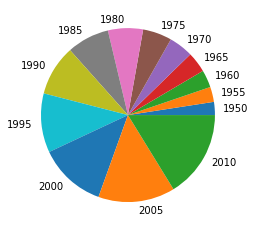

In [91]:

plt.pie(demographics['Total population'], labels=demographics.index)
plt.show()

In [94]:
demographics.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total population,13.0,1.919869e+07,1.153963e+07,6077000.0,9505000.0,16268000.0,27426000.0,40513000.0
Population aged 0–14 (%),13.0,4.623846e+01,3.460621e+00,39.8,42.8,46.5,49.1,50.0
Population aged 15–64 (%),13.0,5.060769e+01,3.385868e+00,47.1,47.5,49.9,53.4,56.3
Population aged 65+ (%),13.0,3.169231e+00,4.625736e-01,2.7,2.8,3.0,3.6,3.9


In [9]:
population_by_province = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_Kenya',header=0)[2]
population_by_province

,Province,2019
0,Kenya (country total),47564296
1,Nairobi (capital city),4397073
2,Central,5482239
3,Coast,4329474
4,Eastern,6821049
5,North Eastern,2490073
6,Nyanza,6269579
7,Rift Valley,12752966
8,Western,5021843


**Set dataframe index**

In [95]:
population_by_province.set_index('Province',inplace=True)

In [98]:
population_by_province

,2019
Province,
Kenya (country total),47564296
Nairobi (capital city),4397073
Central,5482239
Coast,4329474
Eastern,6821049
North Eastern,2490073
Nyanza,6269579
Rift Valley,12752966
Western,5021843


**Drop 'Kenya (country total)' row**

In [101]:
population_by_province = population_by_province.drop(['Kenya (country total)'], axis=0)
population_by_province

,2019
Province,
Nairobi (capital city),4397073
Central,5482239
Coast,4329474
Eastern,6821049
North Eastern,2490073
Nyanza,6269579
Rift Valley,12752966
Western,5021843


**Rename a column in a dataframe**

In [106]:
population_by_province.rename(columns={'2019':'population'}, 
                 inplace=True)

In [107]:
population_by_province

,population
Province,
Nairobi (capital city),4397073
Central,5482239
Coast,4329474
Eastern,6821049
North Eastern,2490073
Nyanza,6269579
Rift Valley,12752966
Western,5021843


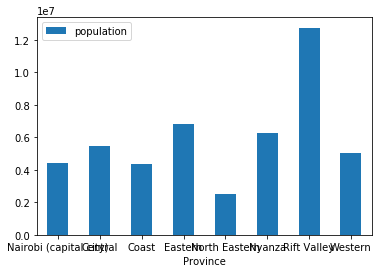

In [109]:
prov = population_by_province.plot.bar(rot=0)

In [10]:
population_by_census = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_Kenya',header=0)[3]
population_by_census 

,Year,Population
0,1962,9980563
1,1969,10942705
2,1979,15327061
3,1989,21448774
4,1999,28686607
5,2009,40610097
6,2019,47564296


**Set dataframe index**

In [110]:
population_by_census.set_index('Year',inplace=True)

In [111]:
population_by_census

,Population
Year,
1962,9980563
1969,10942705
1979,15327061
1989,21448774
1999,28686607
2009,40610097
2019,47564296


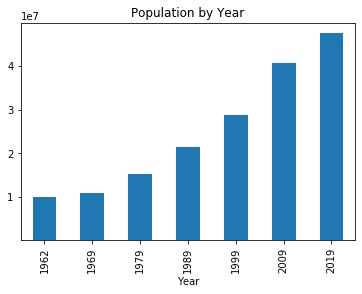

In [120]:
plot = population_by_census.plot(kind='bar', stacked=True, bottom=population_by_census.index,legend=None, title="Population by Year")
plot.plot(population_by_census.index, population_by_census.Population,'k')
plot.set_xlabel("Year")
plt.show()